<a href="https://colab.research.google.com/github/rahultheogre/self_revision_orge_rep/blob/main/NN_%26_CNN_on_MNIST_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Neural Network on MNIST dataset with PyTorch

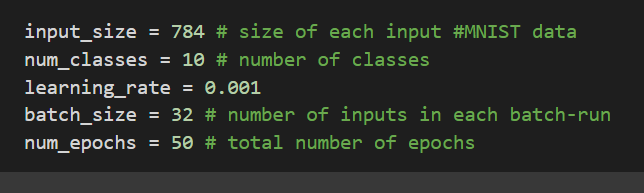

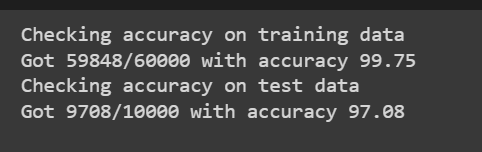

# Usual Workflow

1. Imports
2. Create the network
3. Set device
4. Hyperparameters
5. Load data
6. Initialize network
7. Loss and optimizer
8. Train Network
9. Check accuracy on training and test

# Importing Packages

In [1]:
#entire library
import torch

# all the neural network modules
# even loss functions
import torch.nn as nn 

# all optimization algorithms
# like stochastic gradient, Adam etc
import torch.optim as optim

# all the functions that don't have any parameters
# like ReLU. These functions are included in nn as well
import torch.nn.functional as F

# DataLoader provides us easier dataset management
# minibatches to train on etc 
from torch.utils.data import DataLoader

# helps import standard PyTorch datasets
import torchvision.datasets as datasets

# transformations that we can apply on the datasets
import torchvision.transforms as transform

- Code for processing data samples can get messy and hard to maintain; we ideally want our dataset code to be decoupled from our model training code for better readability and modularity. PyTorch provides two data primitives: torch.utils.data.DataLoader and torch.utils.data.Dataset that allow you to use pre-loaded datasets as well as your own data. 
- Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples.

# Create Network

In [ ]:
class NN(nn.Module):  #this class takes in nn.Module and works on it
  def __init__(self, input_size, num_classes): #initialization creation
  # in our case input size will be 784 nodes (MNIST) and num_clases= 
    super(NN, self).__init__() #super calls the initialization method of the parent class

    # layers of the network
    self.fc1 = nn.Linear(input_size,50) # a hidden layer of 50 nodes
    # in our case the input size will be 784. Because MNIST dataset has 28*28*1 images
    self.fc2 = nn.Linear(50, num_classes) # the last layer which connects 
    #hidden layer with 50 nodes to the output layer

   # nowe we define the forward method
   # in init method we initilialize the layers
  def forward(self,x):
     x  = F.relu(self.fc1(x)) #we first put the x (input) into the first FC, and then over it 
     #we call ReLU and transform x
     x = self.fc2(x)
     return x # now we return x.
     #this is forward pass.
     # this is the method within the class NN

# Setting up Device

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters for NN

In [ ]:

input_size = 784 # size of each input #MNIST data
num_classes = 10 # number of classes
learning_rate = 0.001
batch_size = 32 # number of inputs in each batch-run
num_epochs = 50 # total number of epochs

# Load data

In [12]:
# Load data
# root= where it should save dataste, it is a folder where the dataset is stored
# transform = transforms to Tensor.
# if the dataset is not in the folder dataset/ it won't download


# we have used transform (import torchvision.transforms as transform) to convert 
# the datset into a Tensor object so it can run in PyTorch

# DataLoader helps in creation of batches of data

train_dataset = datasets.MNIST(root='dataset/',train=True,transform=transform.ToTensor(),download=True)
train_loader = DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)

test_dataset = datasets.MNIST(root='dataset/',train=False,transform=transform.ToTensor(),download=True)
test_loader = DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=True)
# shuffle means. for each epoch, the batches will be shuffled. It is important. 

# Initialize the Network

In [ ]:
# creating an object called model of class NN
model = NN(input_size=input_size, num_classes=num_classes).to(device)
# model will have dimension = number of classes
# essentially it will carry number of classes

# Loss and optimizer

In [13]:
#loss function is crossentropy and optimizer is Adam
# optimizer(Adam) takes in the model parameters and learning rate (lr)
# I am going to use 'criterion' as the key word for the Loss function in all my models

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=learning_rate)

# Training Network

In [ ]:
# one epoch means the network has seen all the images in the dataset
# data is the images, and targets is the correct label for each image

# for each epoch we run through one batch 
# batch_idx, (data,targets) is important

# train_loader is the loaded dataset

for epoch in range(num_epochs):
  for batch_idx, (data, targets) in enumerate(train_loader):
    
    # get data
    data = data.to(device=device)
    targets = targets.to(device=device)

    # get to correct shape before feeding it into the network
    # rolling the matrix into a long vector
    # We reshape the data into a vector of length = data.shape[0]
    # -1 is to tranpose. 
    # first dimension remains 64 and 
    data = data.reshape(data.shape[0], -1)

    # feedforward
    scores = model(data) #we feed in the data to the model
    # get the score of classes that we compare with the 
    # targets to get the loss function
    loss = criterion(scores, targets)

    # backward
    optimizer.zero_grad() #it sets all gradients to zero for each batch run
    # the backprop calculations from previous iteration are are not stored
    loss.backward() 

    # adam step or gradient deecent
    optimizer.step()

## A note on backward function of PyTorch

- TORCH.TENSOR.BACKWARD
Tensor.backward(gradient=None, retain_graph=None, create_graph=False, inputs=None)
- Computes the gradient of current tensor w.r.t. graph leaves.

- The graph is differentiated using the chain rule. If the tensor is non-scalar (i.e. its data has more than one element) and requires gradient, the function additionally requires specifying gradient. It should be a tensor of matching type and location, that contains the gradient of the differentiated function w.r.t. self.

- This function accumulates gradients in the leaves - you might need to zero .grad attributes or set them to None before calling it. 

- torch size of 32,1,28,28 means at the end there are 32 images of size 28*28*1

# Run and check accuracy

In [20]:
def check_accuracy (loader , model):
  
  if loader.dataset.train:
    print("Checking accuracy on training data")
  else:
    print('Checking accuracy on test data')

  num_correct = 0
  num_samples = 0
  model.eval()

  with torch.no_grad():
    for x,y in loader:
      x = x.to(device=device)
      y = y.to(device=device)
      # x = x.reshape(x.shape[0], -1) # for CNN we should not reshape

      scores = model(x)
      _, predictions = scores.max(1)
      num_correct += (predictions == y).sum()
      num_samples += predictions.size(0)

    print(f'Got {num_correct}/{num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}')

  model.train()
  

In [21]:
check_accuracy(train_loader, model)
check_accuracy(test_loader, model)

Checking accuracy on training data
Got 4413/60000 with accuracy 7.36
Checking accuracy on test data
Got 765/10000 with accuracy 7.65


# Basic CNN on MNIST dataset

# Designing the CNN Network

In [15]:
class CNN(nn.Module):
  def __init__(self,in_channels, num_classes):
    # in_channels = number of channels in each image
    # num_classes = number of classes
    super(CNN, self).__init__()

    # create a convolutional layer
    self.conv1 = nn.Conv2d( #keep the same dimensions of the output
        in_channels = 1, # number of in channels
        out_channels = 8, 
        kernel_size = (3,3), #filter size
        stride = (1,1), #stride
        padding = (1,1) # padding
    ) # 28*28

    # a pooling layer after the convolution layer
    self.pool = nn.MaxPool2d(
        kernel_size = (2,2),
        stride = (2,2)
    ) # 14*14

    # another conv layer
    self.conv2 = nn.Conv2d( #keep the same dimensions of the output
        in_channels = 8, # number of in channels
        out_channels = 16, 
        kernel_size = (3,3), #filter size
        stride = (1,1), #stride
        padding = (1,1) # padding
    ) # 14*14

    # a FC layer
    self.fc1 = nn.Linear(16*7*7, num_classes) #in forward, we use two Pooling layers
    # so the input is 16*7*7
    # after each conveNet we apply a MaxPool

  def forward(self, x):

# There are four layer. Two convolution layers and two Pooling layers in between
# The convolution layers are set in such a way that the size is preserved
# the pooling layers reduce the size to half
# reLU activation function is used after each convolution layer

    x = F.relu(self.conv1(x)) #a reLU activation after a conveNet
    x = self.pool(x) # a pooling layer
    x = F.relu(self.conv2(x)) #a reLU after Conv2
    x = self.pool(x) # a pooling layer

    #reshape the layer before feeding it to the output layer/Loss Function
    x = x.reshape(x.shape[0],-1)
    x = self.fc1(x) # final FC layer before output 

    return x

# Hyperparameters for CNN

In [5]:
in_channels = 1
num_classes = 10
learning_rate = 0.001
batch_size = 32
num_epochs = 50

# Initialize the CNN network

In [16]:
model = CNN(in_channels=in_channels,num_classes=num_classes).to(device)


# Training the CNN network

In [17]:
for epoch in range(num_epochs):
  for batch_idx, (data,targets) in enumerate(train_loader):

    data = data.to(device=device)
    targets = targets.to(device=device)

    # forward
    scores = model(data)
    loss = criterion(scores,targets)

    #backward
    optimizer.zero_grad()
    loss.backward()

    #gradient descent
    optimizer.step()